# Studies about other variants

# Contents
1. [Notebook setup](#setup)
2. [Baseline: Authors](#authors)

## 1. Notebook setup <a name="setup"></a>

In [1]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}\n')

# Import packages.
import routing
import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks - GitHub
Project folder: C:\Users\muell\thesis_main\thesis_code



In [2]:
# Load training data

X_train = pd.read_pickle('data/generated_final_pickle/df_features_train.pickle')
y_train = X_train.pop('distance')
print(X_train.shape, y_train.shape)

(80000, 43) (80000,)


## 2. Baseline: Authors <a name="authors"></a>

### Beardwood (1959) - TSP

In [3]:
# Beardwood formula + Stein TSP: c*sqrt(n*A)
    # c = constant = 0.75 (Stein, 1978)
    # n = number of customers
    # A = service area

# get features
X_train_beardwood = np.sqrt(X_train['NumCust']) * np.array(X_train['AreaRoot'])
X_train_beardwood = np.array(X_train_beardwood).reshape(-1, 1)

# fit the model
reg_beardwood = LinearRegression(fit_intercept=False)
reg_beardwood.fit(X_train_beardwood, y_train)

# print coefficients
print('\nreg.intercept_ =', reg_beardwood.intercept_)
print('reg.coef_ =', reg_beardwood.coef_)

# save model
# with open('models/baseline_beardwood.pkl', 'wb') as f:
#     pickle.dump(reg_beardwood, f)
    
# cross validation
scores_beardwood = abs(cross_val_score(
    reg_beardwood, X_train_beardwood, y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=KFold(n_splits=5), verbose=0, n_jobs=5))
print(f'\nRMSE (mean, std): %.3f (%.3f)' % (scores_beardwood.mean(), scores_beardwood.std()))


reg.intercept_ = 0.0
reg.coef_ = [1.84586053]

RMSE (mean, std): 4399.789 (43.313)


### Daganzo (1984) - CVRP

In [4]:
# Daganzo CVRP: 2*r*n/Q + 0.57*np.sqrt(n*A)
    # n=num customers
    # A=area
    # r=avg linehaul distance (depot-customer)
    # Q=max num customers per vehicle

# compute features
X_train_daganzo = {}
X_train_daganzo['var1'] = X_train['DepCustAvg'] * X_train['AreaRoot'] * X_train['NumCust'] / (X_train['CapRatio'] * X_train['NumCust'])
X_train_daganzo['var2'] = np.sqrt(X_train['NumCust']) * X_train['AreaRoot']
X_train_daganzo = pd.DataFrame(X_train_daganzo) 

# fit the model
reg_daganzo = LinearRegression(fit_intercept=False)
reg_daganzo.fit(X_train_daganzo, y_train)

# print coefficients
print('\nreg.intercept_ =', reg_daganzo.intercept_)
print('reg.coef_ =', reg_daganzo.coef_)

# save model
# with open('models/baseline_daganzo.pkl', 'wb') as f:
#     pickle.dump(reg_daganzo, f)

# cross validation
scores_daganzo = abs(cross_val_score(
    reg_daganzo, X_train_daganzo, y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=KFold(n_splits=5), verbose=0, n_jobs=5))
print(f'\nRMSE (mean, std): %.3f (%.3f)' % (scores_daganzo.mean(), scores_daganzo.std()))


reg.intercept_ = 0.0
reg.coef_ = [1.82774546 1.21162476]

RMSE (mean, std): 1959.422 (28.347)


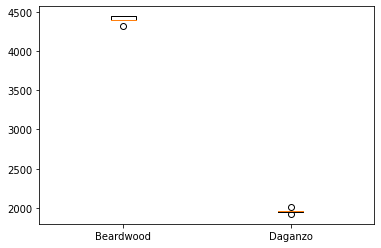

In [5]:
plt.boxplot([scores_beardwood, scores_daganzo], labels=['Beardwood', 'Daganzo'])
plt.show()